In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib widget
# %matplotlib inline

DATAFILE = "data/Leoni.dat"
df = pd.read_csv(DATAFILE, sep=";")

y = df["Schlusskurs"].values
t = df["Eintrag"].values
d = pd.to_datetime(df["Datum"], format="%d.%m.%Y")

Ts = t[1] - t[0]

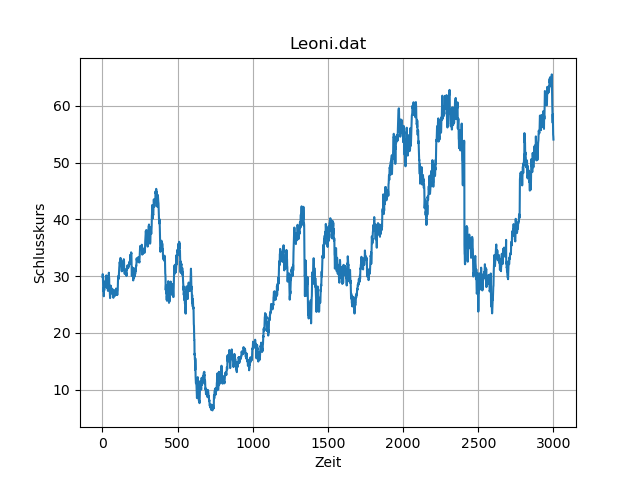

In [23]:
plt.figure()
plt.title("Leoni.dat")
plt.xlabel("Zeit")
plt.ylabel("Schlusskurs")
plt.grid(True)
plt.plot(t, y)
# plt.plot(d, y)
plt.show()


In [24]:
y_rand_var = []
for i in range(0, 3, 1):
    y_rand_temp = random.choices(y[0:600], k=30)

    y_rand_var.append(np.var(y_rand_temp))
    # y_rand_mean = np.mean(y_rand_temp)
    # y_rand_var_temp = np.var(y_rand_temp)
    # y_rand_var = y_rand_var_temp if y_rand_var_temp < y_rand_var else y_rand_var
    # if (y_rand_var_temp < y_rand_var):
    #     y_rand_var = y_rand_var_temp

R = np.array([min(y_rand_var)])
print(R)
Q = np.array([0.00016667])
print(Q)


[13.88258489]
[0.00016667]


In [25]:
# Define system matrices
Ad = np.array([[1, Ts], [0, 1]])
Bd = np.array([[0], [0]])
C = np.array([1, 0])
D = np.array([0])
Gd = np.array([[Ts], [1]])

# Initialization
x_dach = np.array([[y[0]], [0]])  # estimate
P_dach = 60 * np.eye(2)  # kovariance of estimate error
d_y = np.zeros(len(y))  # error
y_dach = np.zeros(len(y))  # estimate error
s = np.zeros(len(y))  # estimate output array
s_dach = np.zeros(len(y))  # estimate array
v = np.zeros(len(y))  # variation
u = np.zeros(len(y))  #

P_tilde0 = np.zeros(len(y))
P_tilde1 = np.zeros(len(y))
P_tilde2 = np.zeros(len(y))
P_tilde3 = np.zeros(len(y))

print(D * u[2])


[0.]


In [26]:
for k in range(len(y)):
    y_dach[k] = C @ x_dach + D * u[k]
    # |------| does nothing in this case (= 0)
    d_y[k] = y[k] - y_dach[k]
    K = P_dach @ C.reshape(-1, 1)
    # K2 = np.linalg.pinv(C @ P_dach @ C.reshape(-1,1) + R) # does not work
    K = K * (C @ P_dach @ C.reshape(-1, 1) + R) ** (-1)
    x_tilde = x_dach + K * d_y[k]  # corrected estimate
    P_tilde = (np.eye(2) - K * C) @ P_dach  # corrected kovariance of estimate error

    x_dach = Ad @ x_tilde + Bd * u[k]
    P_dach = Ad @ P_tilde @ Ad.T + (Gd * Q) @ Gd.T
    s[k] = x_tilde[0]  # corrected estimate array
    v[k] = x_tilde[1]  # variation array
    s_dach[k] = x_dach[0]  # estimate array

    P_tilde0 = P_tilde[0][0]
    P_tilde1 = P_tilde[0][1]
    P_tilde2 = P_tilde[1][0]
    P_tilde3 = P_tilde[1][1]


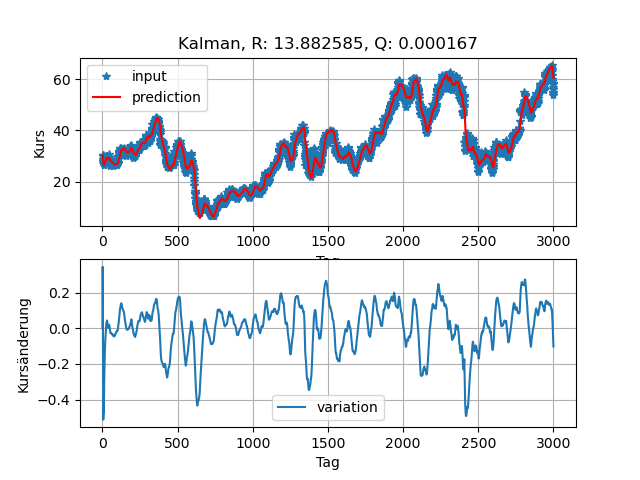

In [27]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title("Kalman, R: %f, Q: %f" % (R, Q))
plt.xlabel("Tag")
plt.ylabel("Kurs")
plt.plot(t, y, "*", label="input")
plt.plot(t, s, "-r", label="prediction")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, v, label="variation")
plt.xlabel("Tag")
plt.ylabel("Kursänderung")
plt.grid(True)
plt.legend()
plt.show()


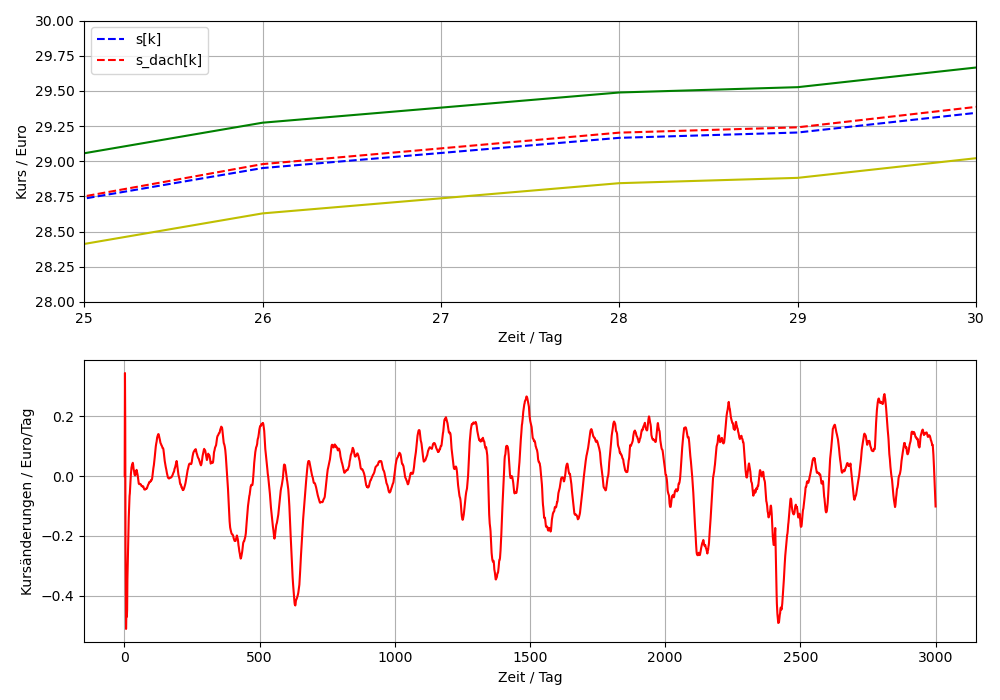

In [28]:
# Plot results
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
# plt.plot(t, y, "-")
plt.plot(t, s, "b--", label="s[k]")
plt.plot(t, s_dach, "r--", label="s_dach[k]")
plt.grid(True)
plt.xlabel("Zeit / Tag")
plt.ylabel("Kurs / Euro")

# fig.add_subplot(4, 1, 2)
plt.plot(t, s + 1.5 * np.sqrt(P_tilde1), "g-")
# plt.grid(True)
# plt.xlabel("Zeit / Tag")
# plt.ylabel("Kurs / Euro")

# fig.add_subplot(4, 1, 3)
plt.plot(t, s - 1.5 * np.sqrt(P_tilde1), "y-")
# plt.grid(True)
# plt.xlabel("Zeit / Tag")
# plt.ylabel("Kurs / Euro")
plt.xlim(25, 30)
plt.ylim(28, 30)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(t, v, "r")
plt.grid(True)
plt.xlabel("Zeit / Tag")
plt.ylabel("Kursänderungen / Euro/Tag")
# plt.legend()
plt.tight_layout()
plt.show()
